### TUTORIAL PARA EL USO DE REDAPY A NIVEL DISTRITAL
Redapy es una libreria escrita en python que permite descargar datos censales del procesador estadístico de Redatam (https://censos2017.inei.gob.pe/redatam/) y transformar sus resultados en una matriz que usa el ubigeo como variable única de indexación.

Para el siguiente ejemplo, vamos a usar el módulo de Redapy para explorar las características de la población que vive en viviendas alquiladas en Lima metropolitana en el año 2017. Para ello, lo primero que haremos será llamar la libreria redapy y la libreria pandas, esencial para el procesamiento de bases de datos.

_OJO: Recuerda que las tablas que devuelve redapy **siempre** son dataframes de la libreria pandas_

In [1]:
import redapy
import pandas as pd

### Quick start

Antes de identificar a la población que vive en viviendas alquiladas, identificamos la condición de las viviendas censadas. Para ello usaremos la variable "vivienda.C2P13" la cual recoge las respuestas sobre la tenencia de la vivienda en el módulo de vivienda del censo 2017. Como nuestra consulta utiliza solo una variable, usamos el valor "frequency" en el parámetro denominado como "tipo" (tipo="Frequency"). Para obtener el resultado esperado, debemos especificar además el nivel de salida de la variable y el ubigeo de interés, que en nuestro caso corresponde al ubigeo de la provincia de Lima Metropolitana (1501). De acuerdo a las indicaciones previas, los parámetros son:
- tipo ="Frequency"
- var1="vivienda.C2P13" 
- area_break="distrito"
- selection="1501"

In [4]:
redapy.query_2017(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:05.877194


,0,1,2,3,4,5
0,Área Geográfica,Área Geográfica,Área Geográfica,Área Geográfica,Área Geográfica,Área Geográfica
1,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION,INLINE SELECTION
2,Frecuencia,Frecuencia,Frecuencia,Frecuencia,Frecuencia,Frecuencia
3,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...,de V: Tenencia de la vivienda - La vivienda qu...
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
527,NaN,Cedida,154 415,"7,10%","99,86%",NaN
528,NaN,Otra forma,3 022,"0,14%","100,00%",NaN
529,NaN,Total,2 175 200,"100,00%","100,00%",NaN
530,NaN,NaN,NaN,NaN,NaN,NaN


El resultado nos muestra que la consulta se ejecutó en cerca de 7 segundos y devolvió una base de datos similar a la que genera una consulta desde la web de REDATAM: una base de datos con una tabla por **UBIGEO**. Este formato se puede apreciar mejor al filtral un determinado número de filas, en este caso filtraremos las filas que van desde 17 hasta la 31. Para ello usaremos el comando _iloc_ de la libreria pandas.

_Nota que hemos nombrado el resultado con el nombre de "df", que es una convención para definir a un dataframe_

In [5]:
df=redapy.query_2017(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")
df.iloc[17:31]

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:05.972781


,0,1,2,3,4,5
17,NaN,AREA # 150102,"Lima, Lima, distrito: Ancón",NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,V: Tenencia de la vivienda - La vivienda que o...,Casos,%,Acumulado %,NaN
20,NaN,Alquilada,1 134,"6,78%","6,78%",NaN
21,NaN,Propia sin título de propiedad,9 539,"57,03%","63,81%",NaN
22,NaN,Propia con título de propiedad,5 111,"30,56%","94,36%",NaN
23,NaN,Cedida,926,"5,54%","99,90%",NaN
24,NaN,Otra forma,17,"0,10%","100,00%",NaN
25,NaN,Total,16 727,"100,00%","100,00%",NaN
26,NaN,NaN,NaN,NaN,NaN,NaN


Este tipo de estructura de datos, si bien resulta de fácil lectura, suele ser poco útil para el análisis comparado ya que no permite organizar fácilmente los datos en una matriz donde cada columna corresponda a una varible y cada fila a un caso como, por ejemplo, uno de los distritos de Lima Metropolitana. Por lo tanto, se requiere transformar esta base de datos compuesta por tablas individuales con información por UBIEGO en una matriz de datos de 2x2 que facilite su análisis y visualización. 

**Redapy** permite transformar estas tablas usando el submódulo **frequency**, el cual recoge los datos de cada tabla y agrupa las respuestas por ubigeo

In [6]:
redapy.frequency(df)

,resp,fre,ubigeo
8,Alquilada,26985,150101
9,Propia sin título de propiedad,10045,150101
10,Propia con título de propiedad,31809,150101
11,Cedida,5326,150101
12,Otra forma,200,150101
...,...,...,...
512,Alquilada,8881,150143
513,Propia sin título de propiedad,27677,150143
514,Propia con título de propiedad,49947,150143
515,Cedida,7209,150143


Esta función, también cuenta con un parámetro que pivotea directamente los datos en una matriz de 2x2, la cual toma la variable de ubigeo como identificador único (index) y las categorias de la variable seleccionada como columnas de matriz.

In [7]:
redapy.frequency(df, pivot=True)

resp,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad
ubigeo,,,,,
150101,26985,5326,200,31809,10045
150102,1134,926,17,5111,9539
150103,38579,9859,191,56636,46421
150104,3802,549,39,5529,1034
150105,9988,1396,63,9972,2980
150106,10497,5723,83,29025,34213
150107,1762,925,8,4904,2168
150108,17977,6291,98,30283,18827
150109,1041,1117,11,1646,5139


De esta forma, con solo **2 líneas de código** y en menos de **5 minutos** obtenemos todas las categorias de la variable en una matriz de 2x2, donde cada fila corresponde a un distrito de Lima Metropolitana y cada columna a una de las categorías de la variable de tenencia de la vivienda. Este resultado puede ser usado para graficar las frecuencias de datos o para visualizar la distribución espacial de la variable en un programa GIS. Para guardar la matriz resultante puedes usar el módulo de pandas _to_excel()_ para grabar el resultado en un archivo de excel.

El resultado final del código para realizar **la consulta, transformar los resultados y guardarlos** sería el siguiente:

In [15]:
df=redapy.query_2017(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")
df1=redapy.frequency(df, pivot=True)

## Guardamos el resultado en un archivo excel
df1.to_excel("Notebooks\\resultados\\tenencia de la vivienda_2017.xlsx")

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:06.303656


### Exploración de los resultados

Si bien la tabla anterior ya puede ser utilizada para hacer operaciones en excel o Qgis, nos interesa realizar algunos cálculos adicionales usando la libreria pandas.
Iniciaremos identificando el porcentaje de viviendas en alquiler por distrito, para ello lo primero que haremos será calcular la suma de viviendas y luego el porcentaje de viviendas alquiladas.

In [16]:
## creamos una variable con la suma total de casos por ubigeo
df1['viviendas_total']=df1.sum(axis=1) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df1['alquiler_p']=((df1.Alquilada/df1.viviendas_total)*100).round(1)
## Ahora mostramos las 5 primeras filas con la condición de que estén ordenadas de mayor a menor
df1.sort_values("alquiler_p",ascending=False).head()

resp,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,viviendas_total,alquiler_p
ubigeo,,,,,,,
150115,22935,3043,113,17967,4730,48788,47.0
150137,22872,4734,55,14796,9336,51793,44.2
150105,9988,1396,63,9972,2980,24399,40.9
150134,5471,805,24,6083,1219,13602,40.2
150141,10159,1303,58,13129,3177,27826,36.5


La tabla anterior muestra que en los ditritos de la Victoria (150115), Santa Anita (150137), Breña (150105), San Luis (150134) y Surquillo (150141), se encuentran el mayor porcentaje de viviendas alquiladas en el año 2017, respectivamente. Por otra parte, que la vivienda se encuentre alquilada no quiere decir que la mayoría de hogares o personas del distrito vivian en viviendas alquiladas. Por esta razón calculamos la misma información pero a nivel de persona censada. Usaremos nuevamente el módulo de redapy, pero agregaremos una variable a la consulta: el sexo del encuestado (C5P2). Esto se logra cambiando el parámetro _tipo_ por "Crosstab" que nos permite realizar consultas para 2 variables (var1="vivienda.C2P13" y var2="poblacion.C5P2").

_Nota: Además pasamos el parámetro mensajes =False para reducir el número de msj durante la ejecución de la función y solo mantener el tiempo de extracción de datos desde REDATAM_

In [17]:
df2=redapy.query_2017(tipo='Crosstab',var1="vivienda.C2P13", var2="poblacion.C5P2",area_break="distrito",selection="1501", mensajes=False)
df2=redapy.cross_table(df2) ## Usamos el submodulo cross_table
df2.head(10)


Tabla scrapeada con éxito en: 0:00:06.514828


freq
ubigeo fila                           columna        
150101 Alquilada                      Hombre    41312
                                      Mujer     43489
                                      Total     84801
       Propia sin título de propiedad Hombre    17431
                                      Mujer     19007
                                      Total     36438
       Propia con título de propiedad Hombre    58133
                                      Mujer     62707
                                      Total    120840
       Cedida                         Hombre     9422

Ahora podemos ver que tenemos el total de hombres y mujeres por el ubigeo del distrito y el tipo de tenencia de la vivienda. A continuación, haremos algunos cambios a la tabla para lograr obtener el dato deseado.

_OJO: Si quisieramos tener una tabla multicolumna, solo sería necesario pasar el parámetro pivot=True en el submodulo cross_table: redapy.cross_table(df2, pivot=True)_

In [18]:
## Nos quedamos con la variable total y pivoteamos el resultado
df2=df2.reset_index().query('columna=="Total"').pivot(index="ubigeo",columns="fila",values="freq")
## sumamos todas las variables para tener el total de población por tipo de tenencia
df2['pob_total']=df2.sum(axis=1) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df2['alquiler_pob_p']=((df2.Alquilada/df2.pob_total)*100).round(1)
## Ahora mostramos las 5 primeras filas con la condición de que estén ordenadas de mayor a menor
df2.sort_values("alquiler_pob_p",ascending=False).head(9)

fila,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,pob_total,alquiler_pob_p
ubigeo,,,,,,,
150115,73605,10712,400,67698,17302,169717,43.4
150105,31795,4968,205,35794,10286,83048,38.3
150137,69309,18334,188,65667,40722,194220,35.7
150116,18446,2768,61,28427,4417,54119,34.1
150134,17293,3084,81,25532,5027,51017,33.9
150141,29081,4415,185,43873,11397,88951,32.7
150101,84801,19113,672,120840,36438,261864,32.4
150104,10620,1769,138,17827,3464,33818,31.4
150122,29951,2461,166,58847,5897,97322,30.8


En relación a la población en vivienda alquiladas, el distrito de Breña es el segundo distrito con más población en viviendas alquiladas, ello a pesar de ser el tercero con más viviendas con tenencia en situación de alquiler. Algo similar ocurre con el distrito de Lince (150116) el cual a pesar de ser el 7mo distrito con mayor porcentaje de viviendas en alquiler, es el cuarto con más población habitandolas.

Esta información no lleva a la siguiente pregunta, ¿cuál es el ratio entre población y viviendas alquiladas? Para resolver esta pregunta, procederemos a unir ambos _Dataframes_ (viviendas por tipo de tenencia y población por tipo de tenencia de la vivienda) usando la función _join_ de pandas y calcular nuestro indicador.

_**Este ejercicio resulta mucho más sencillo, gracias a que la función de limpieza de Redapy toma siempre al ubigeo como variable clave para indexar la información**, otra manera de hacer esta operación sería con la función de pandas **merge**_

In [19]:
## unimos ambas BD usando la función join que utiliza los index para hacer el merge
df3=(df1[["Alquilada","viviendas_total","alquiler_p"]].
     join(df2.rename({"Alquilada":"Alquilada_pob"},axis=1)[["Alquilada_pob","pob_total","alquiler_pob_p"]]))

## Calculamos el ratio
df3["ratio"]=(df3.Alquilada_pob/df3.Alquilada).round(2)
df3.sort_values("ratio",ascending=False).head()

,Alquilada,viviendas_total,alquiler_p,Alquilada_pob,pob_total,alquiler_pob_p,ratio
ubigeo,,,,,,,
150142,11964,83775,14.3,47610,389331,12.2,3.98
150106,10497,79541,13.2,39551,330190,12.0,3.77
150125,12092,79210,15.3,45099,325718,13.8,3.73
150143,8881,93821,9.5,33061,393360,8.4,3.72
150133,13078,78130,16.7,48525,350551,13.8,3.71


Luego de cruzar ambos _dataframes_, observamos que el ratio más alto de personas por vivienda alquilada se encuentra en el distrito de Villa el Salvador con casi 4 personas por vivienda alquilada, ello a pesar de que el porcentaje de población en vivienda alquiladas es de solo 12%. Por su parte, el distrito de Miraflores tiene el ratio más bajo de personas por vivienda alquilada con alrededor de 2 personas por vivienda con este tipo de tenencia, además de ser el noveno distrito con más población en viviendas alquiladas con 31% de sus vecinos alquilando una vivienda en el distrito

In [20]:
df3.sort_values("ratio",ascending=False).tail()

,Alquilada,viviendas_total,alquiler_p,Alquilada_pob,pob_total,alquiler_pob_p,ratio
ubigeo,,,,,,,
150141,10159,27826,36.5,29081,88951,32.7,2.86
150104,3802,10953,34.7,10620,33818,31.4,2.79
150131,5084,20652,24.6,13717,59872,22.9,2.70
150138,51,282,18.1,137,985,13.9,2.69
150122,12537,36953,33.9,29951,97322,30.8,2.39


### Visualización en forma de mapa
Ahora que tenemos nuestros indicadores podemos visualizarlos en forma de mapa usando los límites distritales del INEI. Para ello usaremos la libreria **_geopandas_**, la cual permite trabajar con datos vectoriales. Además, usaremos los shps de distritos 2017 descargados del siguiente enlace: https://ide.inei.gob.pe/#capas

También usaremos la librería **_matplotlib_**, la cual permite crear visualizaciones complejas

_Este mismo ejercicio de visualización se puede realizar con otros programas de GIS como, por ejemplo, QGIS_

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt ## libreria para la visualización de data

Text(0.5, 1.0, 'Ratio entre el total de personas en viviendas\n alquiladas y el total de viviendas alquiladas')

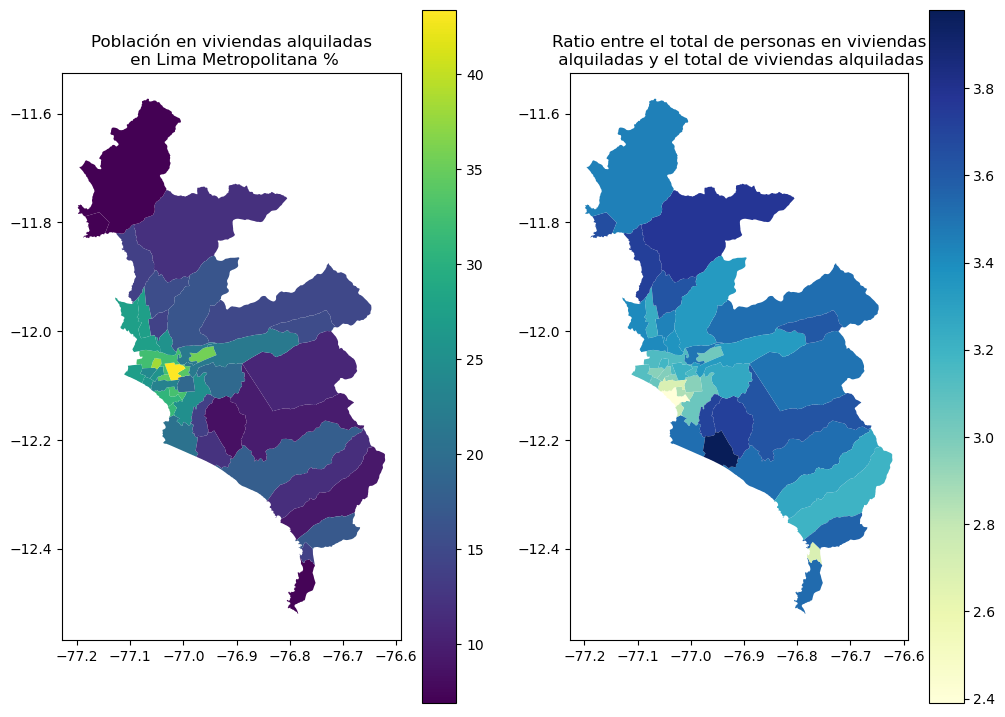

In [22]:
## Hacemos el merge entre la BD espacial y nuestro dataframe con los indicadores que queremos graficar
dis17=gpd.read_file('Bases originales\\Límites nacionales\\Distrito.gpkg') ## en este caso nuestra BD espacial está guardada como gpkg y contiene un único layer
dis17=dis17.set_index('ubigeo').merge(df3, right_index=True, left_index=True, how='inner', validate='1:1')

## Usaremos la libreía Matplotlib para graficar el resultado
fig,ax=plt.subplots(1,2, figsize=(12,9))

dis17.plot("alquiler_pob_p",ax=ax[0], legend=True)
dis17.plot("ratio",ax=ax[1], legend=True, cmap="YlGnBu")

ax[0].set_title("Población en viviendas alquiladas\n en Lima Metropolitana %") 
ax[1].set_title("Ratio entre el total de personas en viviendas\n alquiladas y el total de viviendas alquiladas")

### Filtros para consultas en REDATAM

Ahora que conocemos el total de personas que viven en viviendas alquiladas, imaginemos que queremos conocer su permanencia en el distrito en los últimos 5 años y en qué distrito vivia antes en caso se haya mudado en los últimos 5 años. Para este ejemplo tomaremos como referencia la respuesta del jefe del hogar sobre el lugar donde vivía hace 5 años. Para realizar la consulta multivariable en vez de solicitar un reporte de 2 o más variables usaremos del parámetro _for_query_, el cual permite construir un filtro que combina  una o más variables y sus respectivos valores. El detalle de los subparametros es el siguiente:

- ***variables***: lista la variable o variables que se usarán en el filtro.
- ***category***: lista el valor de la categoría que se usará para filtrar cada variable. ___Nota que la categoría siempre es un valor númerico, para saber el valor de la respuesta puedes revisar la cédula censal___
- ***logical_exp***: lista la expresión lógica que se usará para filtrar la variable (equal, greater than, less than, etc)
- ***operator***: es el operador que se usará para filtrar las variables, puede ser "and" u "or"

Como no requerimos de más de una varible usamos la consulta del tipo "frequency" para solicitar a Redatam la información sobre el lugar donde vivía el jefe del hogar hace 5 años ("poblacion.C5P6PV"). Para garantizar que la consulta devuelva solo información de las viviendas alquiladas ("vivienda.C2P13") y del jefe del hogar ("poblacion.C5P1"), construimos nuestro filtro para ambas variables. En este caso tanto la condición de alquiler de la vivienda como la condición de jefe del hogar corresponde a los valores "1 ('category':["1", "1"]). Finalmente, especificamos en el **_operator_** que ambas condiciones se cumplan, para ello usaremos el valor ['and'] 

In [101]:
df4=redapy.query_2017(tipo='Frequency',var1="poblacion.C5P6PV",area_break="distrito",selection="1501",
                        for_query={'variables':["vivienda.C2P13","poblacion.C5P1"],
                                   'category':["1","1"],
                                   'logical_exp':["equal"],
                                   'operator':['and']}, mensajes=False)

df4=redapy.frequency(df4)
df4.head(5)

Tabla scrapeada con éxito en: 0:00:17.253603


,resp,fre,ubigeo
10,Continente América,446,150101
11,Continente Asia,35,150101
12,Continente Europa,67,150101
13,Continente Oceanía y Otras Regiones Polares,2,150101
14,Continente no especificado,2,150101


En un aproximado de 15 segundos obtenemos la tabla con la frecuencia de los lugares donde vivian hace 5 años los jefes del hogar que vivie en viviendas alquiladas. Para identificar aquellos que viven fuera de Lima Metropolitana, recodificamos la variable _resp_ diferenciando entre los que no vivian hace 5 años en LM ("no_LM") y los que sí vivian en LM ('si_LM') durante este perido de tiempo.

In [102]:
#Recodificamos la variable resp en una nueva variable llamada resp2.
df4['resp2']="no_LM"
df4.loc[df4['resp'].str.contains('Continente'), 'resp2'] = "otro_continente"
df4.loc[df4['resp'].str.contains("provincia de Lima"), 'resp2'] = "si_LM"
#agrupamos la variable recodicada por ubigeo sumamdo las fecuencias. luego pivoteamos la BD para tener una matriz de 2x2 con el ubigeo como index
df4=df4.groupby(["ubigeo","resp2"]).sum(numeric_only=True)[['fre']].reset_index().pivot(index="ubigeo",columns="resp2",values="fre")

## sumamos todas las variables para tener el total de los jefes del hogar por lugar donde vivian en los últimos 5 años
df4['jh_total']=df4.sum(axis=1) 
## creamos una variable con el porcentaje de los jefes del hogar que vivian fuera de la provincia de Lima metropolitana
df4['jf_fuera_LM']=((df4.no_LM/df4.jh_total)*100).round(1)
df4['jf_fuera_LM_otro_con']=(((df4.no_LM+df4.otro_continente)/df4.jh_total)*100).round(1)
df4.sort_values("jf_fuera_LM_otro_con", ascending=False).head(6)

resp2,no_LM,otro_continente,si_LM,jh_total,jf_fuera_LM,jf_fuera_LM_otro_con
ubigeo,,,,,,
150122,859,2723,9153,12735,6.7,28.1
150139,143,9,418,570,25.1,26.7
150138,12,3,43,58,20.7,25.9
150124,77,2,231,310,24.8,25.5
150131,319,976,3885,5180,6.2,25.0
150119,1025,81,3632,4738,21.6,23.3


Ahora podemos saber que el mayor procentaje de jefes del hogar en viviendas alquiladas que no vivian hace 5 años en la provincia de Lima metropolitan se encuentra en el distrito de Miraflores (150122) con 28% del total de jefes del hogar en el distrito. Llama la atención que de este total, 21% sea de jefes del hogar que vivían en el extranjero. Por su parte, el distrito donde se encuentra el menor número de jefes del hogar que no vivian en Lima Metropolitana hace 5 años es el distrito del Rimac, con solo 9% seguido por el distrito de Chaclacayo con 10% del total de jefes del hogar en vivienda alquiladas.

Ahora que sabemos que cerca del 84% de los jefes del hogar en vivienda alquiladas vivían en la provincia de Lima en los último 5 años, revisemos si estos datos son similares a nivel interdistrital. Para ello usaremos la pregunta sobre el distrito en que vivia el jefe del hogar hace 5 años ("poblacion.C5P6DI"). De forma similar al ejemplo anterior, pasaremos un filtro que considere la variable sobre la tenencia de la vivienda ('vivienda.C2P13') y la relación con el jefe del hogar ('poblacion.C5P1').

In [59]:
df5=redapy.query_2017(tipo='Frequency',var1="poblacion.C5P6DI",area_break="distrito",selection="1501",
                      for_query={'variables':["vivienda.C2P13","poblacion.C5P1"],
                                 'category':["1","1"],
                                 'logical_exp':["equal"],
                                 'operator':['and']})

df5=redapy.frequency(df5)
df5.head()

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:42.231539


,resp,fre,ubigeo
10,Continente América país Argentina,30,150101
11,Continente América país Bolivia,3,150101
12,Continente América país Brasil,11,150101
13,Continente América país Canadá,2,150101
14,Continente América país Chile,28,150101


Procedemos a recodificar la variable resp para separar los lugares de procedencia de acuerdo con el departamento, provincia y distrito. Luego, usaremos la BD espacial de distritos 2017 para agregarle el ubigeo a cada uno de nuestros lugares de procedencia. Una vez recodificado el ubigeo de procedencia ('ubigeo_pro') creamos una nueva variable que identifique el total de jefes del hogar que no vivian en el mismo distrito de LM en los últimos 5 años.

In [85]:
# Creamos tres nuevas variables con los datos del departamento, provincia y distrito de  procedencia del jefe del hogar. 
df5["resp"]=df5["resp"].str.upper()
df5["dep"]=df5.resp.str.split(",", expand=True)[0]
df5["prov"]=df5.resp.str.split(",", expand=True)[1].str.strip()
df5["dis"]=df5.resp.str.split(":", expand=True)[1].str.strip().replace(["Á","É","Í","Ó","Ú"],["A","E","I","O","U"], regex=True)

## agregamos el ubigeo a los lugares de procendecia. Para ello haremos un loop usando los nombres de los ditritos de la BD espacial de distritos 2017- INEI
df5["ubigeo_pro"]=""
for ubigeo, dis_name in dis17["nombdist"].items():
    df5.loc[(df5.dis==dis_name) & (df5.dep=="LIMA") & (df5.prov=="LIMA"),"ubigeo_pro"]= ubigeo

## Mantenemos únicamente las variables que necesitamos
df5=df5[['resp', 'fre','ubigeo_pro', 'ubigeo']].copy()

## Creamos una nueva variable con el resultado de la comparación entre ubigeos.
df5["resp2"]="otro_distrito_fuera_LM"
df5.loc[((df5['ubigeo_pro']==df5['ubigeo']) & (df5.ubigeo_pro!="")) | (df5['resp']==("LIMA, LIMA, DISTRITO NO ESPECIFICADO")) , 'resp2'] = "mismo_distrito_LM"
df5.loc[(df5['ubigeo_pro']!=df5['ubigeo']) & (df5.ubigeo_pro!=""), 'resp2'] = "otro_distrito_LM"
df5.loc[(df5['resp'].str.contains('PAÍS'))|(df5['resp'].str.contains('CONTINENTE'))|(df5['resp']=="9999"), 'resp2'] = "otro_pais"


In [86]:
## Agrupamos la nueva variable por ubigeo de destino (el ubigeo donde se ubica el jefe del hogar), sumamos los resultados de la nueva variable ('resp2') y pivoteamos la BD
df6=df5.groupby(["ubigeo","resp2"]).sum(numeric_only=True)[['fre']].reset_index().pivot(index="ubigeo",columns="resp2",values="fre")
## sumamos todas las variables para tener el total de población por tipo de tenencia
df6['jh_total']=df6.sum(axis=1) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df6['jh_otro_dis_LM_p']=((df6.otro_distrito_LM/df6.jh_total)*100).round(1)
df6.sort_values("jh_otro_dis_LM_p", ascending=False).head(5)

resp2,mismo_distrito_LM,otro_distrito_LM,otro_distrito_fuera_LM,otro_pais,jh_total,jh_otro_dis_LM_p
ubigeo,,,,,,
150130,4090,2241,743,343,7417,30.2
150120,2820,1551,556,267,5194,29.9
150139,249,169,143,9,570,29.6
150138,26,17,12,3,58,29.3
150131,2414,1471,319,976,5180,28.4


La mayoria de los jefes del hogar que hace 5 años vivian en un distrito distito al distrito donde fueron censados se encuentra en el distrito de San Borja y Magdalena con 30.2% y 29.9%, respectivamente. Podemos observar que a diferencia de lo que sucede con el distrito de Santa Rosa (150139), en estos dos el porcentaje de jefes del hogar en viviendas alquiladas que vivian fuera de Lima Metropolitana es de alrededor de 15% lo que los situa por debajo de la media de los distritos de LM (17%).

Estos datos pueden apreciarse mejor si son visualizados en espacialmente. Para ello, volvemos a usar la data spacial de distritos 2017 del INEI. Se revela cierta concentración en los distritos del sur de Lima de hogares que no vivian en la provincia de Lima hace 5 años. Mientras que cambio interdistrital de los hogares que viven en viviendas alquiladas al interior de LM se estaría concentrando en los distritos de Lima centro como San Borja, Magdalena, Puedo Libre, San Miguel y Barranco.

Text(0.5, 1.0, 'Jefes del hogar en viviendas alquiladas\n que hace 5 años vivian en otro distrito\n de Lima Metropolitana %')

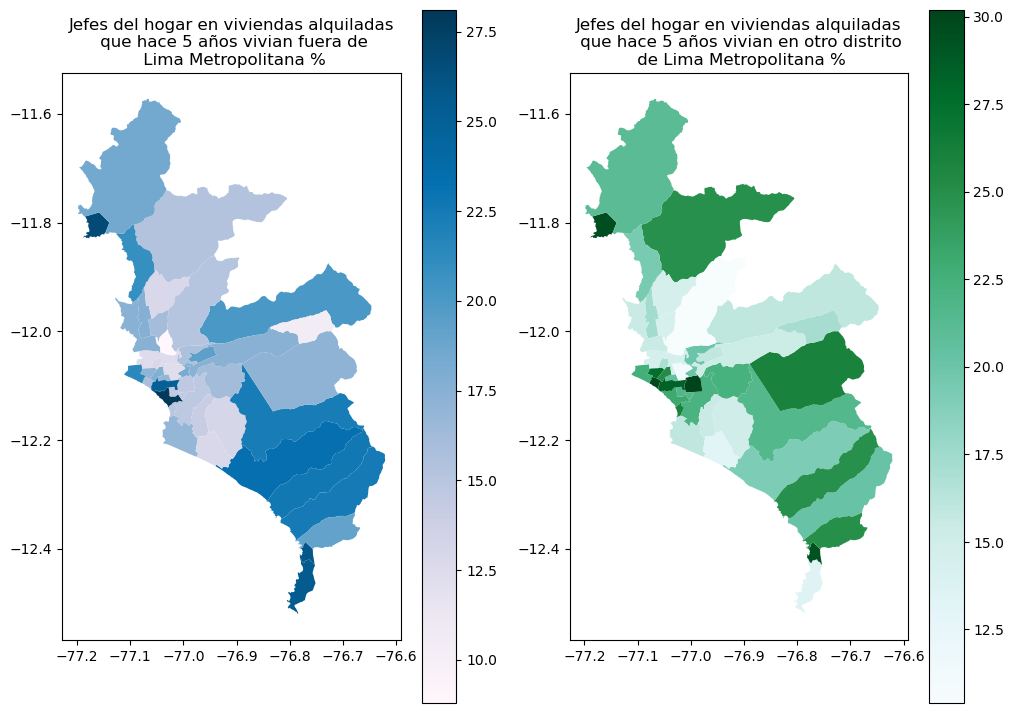

In [90]:
df7=df4[['jf_fuera_LM_otro_con']].join(df6[['jh_otro_dis_LM_p']].sort_index())
vis2=dis17.merge(df7, right_index=True, left_index=True, how='inner', validate='1:1')

## Usaremos la libreía Matplotlib para graficar el resultado
fig,ax=plt.subplots(1,2, figsize=(12,9))

vis2.plot("jf_fuera_LM_otro_con",ax=ax[0], legend=True, cmap="PuBu")
vis2.plot("jh_otro_dis_LM_p",ax=ax[1], legend=True, cmap="BuGn")

ax[0].set_title("Jefes del hogar en viviendas alquiladas\n que hace 5 años vivian fuera de\n Lima Metropolitana %") 
ax[1].set_title("Jefes del hogar en viviendas alquiladas\n que hace 5 años vivian en otro distrito\n de Lima Metropolitana %")

### Análisis de las redes de procedencia y destino de los hogares que alquilan una vivienda en el 2017

Finalmente, revisamos de forma general lo 5 principales nodos de atracción de hogares que alquilan viviendas en el 2017. Para ello, haremos uso de la libreria _networkx_ la cual permite convertir la Base de datos en un estructura de redes. Para una mejor visualización, solo se considera para el análisis los 4 primeros distritos de procedencia para cada uno de nuestros 5 principales destinos seleccionados.

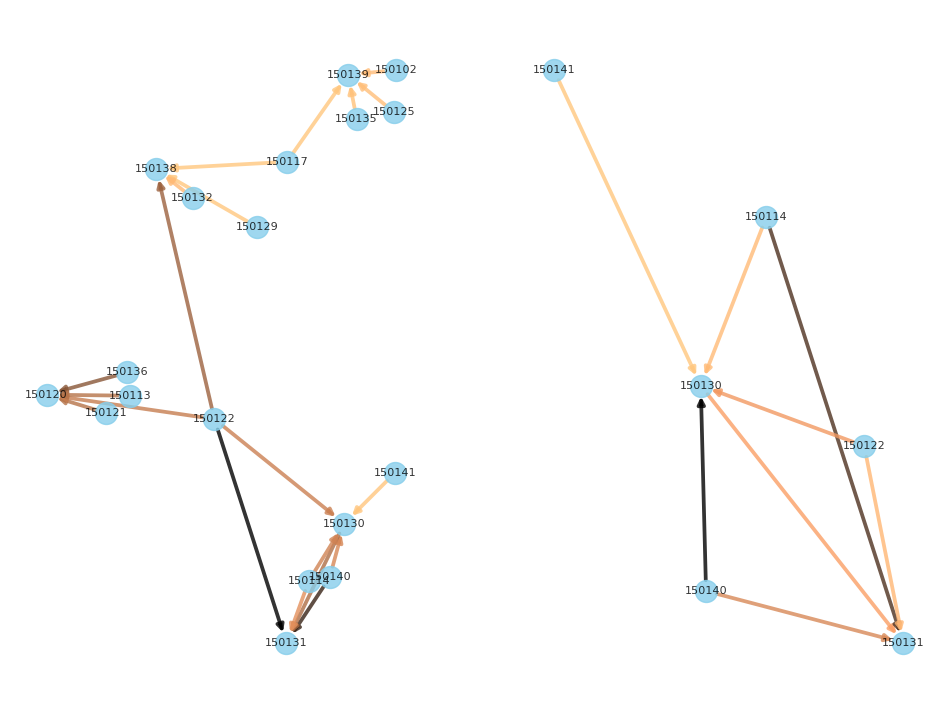

In [128]:
# libraries
import numpy as np
import networkx as nx

def keep_first2(df):
    df=df.sort_values('fre', ascending=False).iloc[0:4]
    return df

df8=(df5.
     groupby(["ubigeo","ubigeo_pro","resp2"]).
     sum(numeric_only=True)[['fre']].
     reset_index('resp2').
     query('resp2=="otro_distrito_LM"').
     groupby(level=0).
     apply(keep_first2).
     reset_index(level=0, drop=True).
     reset_index()
    )

v1=df8.query('ubigeo=="150130" | ubigeo=="150120" | ubigeo=="150139" | ubigeo=="150138"|ubigeo=="150131"').copy()
v2=df8.query('ubigeo=="150130" |ubigeo=="150131"').copy()

# # Build your graph
G1=nx.from_pandas_edgelist(v1, 'ubigeo_pro', 'ubigeo', create_using=nx.DiGraph())
G2=nx.from_pandas_edgelist(v2, 'ubigeo_pro', 'ubigeo', create_using=nx.DiGraph())

# Plot it
f, ax=plt.subplots(1,2, figsize=(12,9))
nx.draw(G1, with_labels=True, arrows=True, node_size=250, font_size=8, width=2.7,node_color='skyblue', alpha=0.8, edge_color=v1['fre'],ax=ax[0],edge_cmap=plt.cm.copper_r)
nx.draw(G2, with_labels=True, arrows=True, node_size=250, font_size=8, width=2.7,node_color='skyblue', alpha=0.8, edge_color=v2['fre'],ax=ax[1],edge_cmap=plt.cm.copper_r)

plt.show()

Del gráfico anterior se puede observar que los 3 de los 5 distritos de mayor población en viviendas alquiladas se consolidan como nodos claros de atracción. A su vez, 4 cuatro de los 5 distritos son lugares de recepción de hogares que hace 5 años vivian en viviendas alquiladas en el distrito de Miraflores, donde destaca el ditrito de San Isidro, Santa Maria del Mar y Magdalena del Mar. Finalmente, llama la atención la dinámica entre San Borja (150130), San Isidro (150131), Santiago de Surco (150140) y La Molina (150114), cuyos distritos forman un subsistema de nodos y flujos.